<a href="https://colab.research.google.com/github/AruneshTamboli/EDA-Hotel-Booking-Analysis/blob/main/(Self)_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Member’s Name and Contribution:**
**Arunesh Tamboli-**

**Contribution:**
1.	Data Wrangling         
 a.	Data Cleaning
    i.	Detecting null values
    ii.	Replacing null values Zeros
 b.	Handling Outliers
2.	Year wise Comparison of Hotel Bookings
3.	Total bookings cancelled
4.	Booking types for Market segment
5.	Number of night stays in hotels
6.	Total number of special requests

**N. Dinesh Kumar-**

**Contribution:**
1.	Data Wrangling         
 a.	Data Cleaning
    i.	Detecting null values
    ii.	Replacing null values Zeros
 b.	Handling Outliers
2.	Month wise comparison of bookings
3.	Booking percentage between 2 hotels
4.	Repeated guests percentage between 2 hotels
5.	Number of night stays in hotels
6.	Total number of special requests

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Importing Libraries**

In [ ]:
#Importing required Libraries

import numpy as np #for arrays
import pandas as pd #for mounting data and for data manipulation
import seaborn as sns #for interactive plots
import matplotlib.pyplot as plt #for 2-d quick visualization
%matplotlib inline #for intime plotting of graphs

## **Mounting the data File**

In [ ]:
#get the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the data file**

In [ ]:
#importing data and specifying path

file_path = "/content/drive/MyDrive/Almabetter/Module 1 : python for data science/EDA capstone project/Hotel Bookings.csv"
df_hotel = pd.read_csv(file_path)

In [ ]:
#to find rows and columns in dataset
df_hotel.shape

(119390, 32)

In [ ]:
#to check for null values and datatypes
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking data = first 5 rows
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Checking the Null values**

In [ ]:
#using isnull to find null values

total = df_hotel.isnull().sum().sort_values(ascending=False)
percent = (df_hotel.isnull().sum()/df_hotel.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
is_canceled,0,0.000000
market_segment,0,0.000000


## **Replacing the null values with zeros**

In [ ]:
#  When we find null values, we can do multiple operations on it like replacing null values with mean, median, mode or deleting entire column or deleting rows which contain null values. 
#  After doing multiple experiment we found it is best to replace null values with Zeroes

df_hotel[['children','agent','company']] = df_hotel[['children','agent','company']].fillna(0.0)
##df_hotel = df_hotel.drop((missing_data[missing_data['Total'] > 1]).index,1)
##df_hotel.isnull().sum().max()

In [ ]:
#cross checking

df_hotel.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#  checking for dataset

df_hotel.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22


In [ ]:
#finally replacing null values with Zeroes

df_hotel[['children','agent','company','country',]] = df_hotel[['children','agent','company','country']].fillna(0.0)

In [ ]:
# removing cancelled orders as cancelled orders are of no use

df_hotel[['children','company', 'agent','adr']] = df_hotel[['children','company', 'agent','adr']].astype('int64')
df_not_canceled = df_hotel[df_hotel['is_canceled'] == 0]

In [ ]:
#Cross checking values

df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   is_canceled                     119390 non-null  int64 
 2   lead_time                       119390 non-null  int64 
 3   arrival_date_year               119390 non-null  int64 
 4   arrival_date_month              119390 non-null  object
 5   arrival_date_week_number        119390 non-null  int64 
 6   arrival_date_day_of_month       119390 non-null  int64 
 7   stays_in_weekend_nights         119390 non-null  int64 
 8   stays_in_week_nights            119390 non-null  int64 
 9   adults                          119390 non-null  int64 
 10  children                        119390 non-null  int64 
 11  babies                          119390 non-null  int64 
 12  meal                          

# **Exploratory Data Analysis**

## **Year Wise Comparison of the Bookings**


2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64


Text(0.5, 0, 'Year')

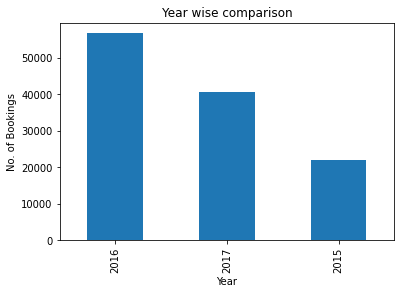

In [ ]:
#COMPAIRING BOOKINGS YEAR WISE TO GET AN OVERVIEW

item_counts = df_hotel["arrival_date_year"].value_counts()
print(item_counts)
item_counts = df_hotel["arrival_date_year"].value_counts().plot(kind='bar').figsize=(7,5)
plt.title('Year wise comparison')
plt.ylabel('No. of Bookings')
plt.xlabel('Year')

### The Year 2016 is has more number of booking out of 3 years

## **Comparison in percentage**

Text(0.5, 0, 'Year')

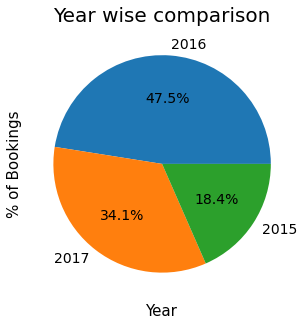

In [ ]:
# visualizing our result into pie chart form for better understanding

item_counts = df_hotel["arrival_date_year"].value_counts()
item_counts.plot.pie(figsize = (10,5),fontsize = 14, autopct="%.1f%%")
plt.title('Year wise comparison',fontsize = 20)
plt.ylabel('% of Bookings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)

### With pie chart, picture is clearer.

## **Comparsion between two hotels on the basis of year wise booking**

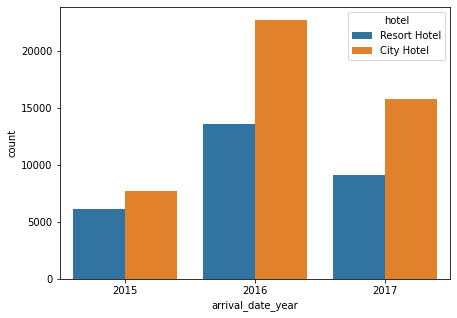

In [ ]:
# Now compairing both given hotels, Resort and city hotels year-wise

plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

### **Insights:** 2016 has more number of Bookings with 47.5% and it went down to 34.1% in 2017
### **The Year 2016 has registered highest number of booking ,but overall the city hotel has the high booking percentage when compare to resort hotel.

## **Month wise Comparison of Bookings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


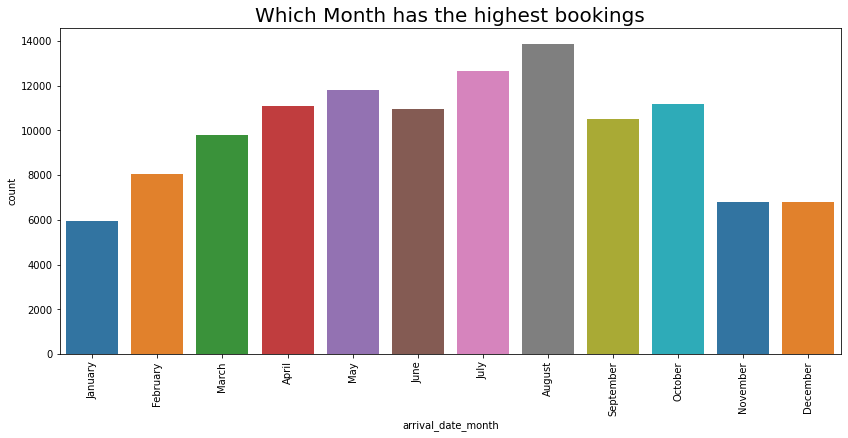

In [ ]:
#creating a list of all the months and finding which month has highest booking

month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
plt.title("Which Month has the highest bookings", fontdict = {'fontsize': 20})
sns.countplot(df_hotel['arrival_date_month'], palette='tab10', order = month_sorted)
plt.xticks(rotation = 90)
plt.show()

### August month has highest booking in a year

## **Number of booking per each Month in a Year**

Text(0.5, 0, 'month')

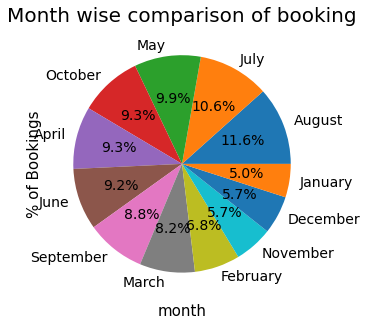

In [ ]:
# visualizing using pie chart

item_counts = df_hotel["arrival_date_month"].value_counts()
item_counts.plot.pie(figsize = (10,5),fontsize = 14, autopct="%.1f%%")
plt.title('Month wise comparison of booking',fontsize = 20)
plt.ylabel('% of Bookings',fontsize = 15)
plt.xlabel('month',fontsize = 15)

### August month has highest booking rate with 11.6% when compare to other Months

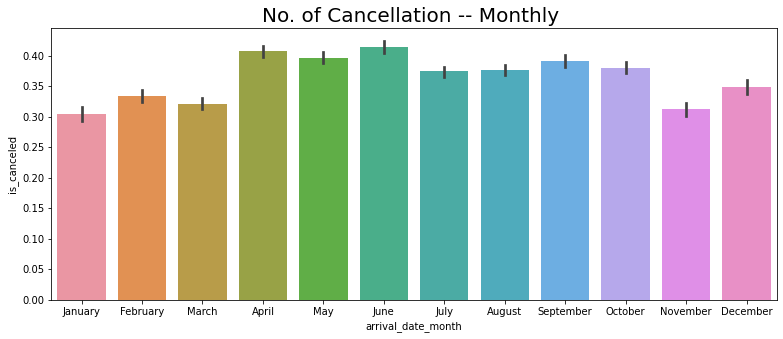

In [ ]:
#Calculating no. of cancellation and then plotting it

month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize = (13,5))
# sns.set(style="dark")
plt.title("No. of Cancellation -- Monthly ", fontdict={'fontsize': 20})
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = df_hotel, order = month_sorted);

### The Cancellation rate is high in the 2rd quarter which is (april,May,June) whyen compared to other quarters

## **Number of booking between the two Hotel**

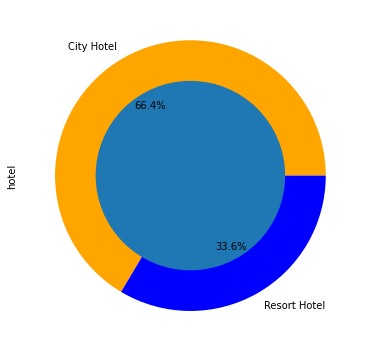

In [ ]:
#visualizing and then compairing both hotels

plt.figure(figsize=(10,5))
data = df_hotel.groupby("hotel")["hotel"].count()
colors = ['orange','blue']
data.plot.pie(autopct="%.1f%%",colors=colors);
centre_circle = plt.Circle((0,0),0.70,)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()


### City Hotel has Booking ratio of 66.4% which almost double the Resort hotel booking 33.6%

## **How many bookings were cancelled ?**



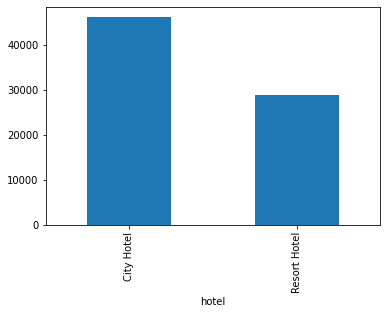

In [ ]:
#Compairing both hotels on the basis of bookings cancelled

dff=df_hotel[df_hotel['is_canceled']==0]
df2=dff.groupby('hotel')['is_canceled'].count()
df2.plot(kind='bar')
plt.show()

In [ ]:
#result in dataframe form

dff=df_hotel[df_hotel['is_canceled']==0]
df2=dff.groupby('hotel')['is_canceled'].count()
df2.reset_index()

,hotel,is_canceled
0,City Hotel,46228
1,Resort Hotel,28938


### City hotel has more number of Bookings then the resort hotel because the number of bookings for the city hotel is Hifg when compare to Resort hotel

## **Countrywise total number of guests**

In [ ]:
#Calculating Countrywise total number of guests

guests = df_hotel[df_hotel['is_canceled'] == 0]['country'].value_counts().reset_index()
guests.columns = ['country', 'No of guests']
guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,KIR,1
162,BHR,1
163,MMR,1
164,SMR,1


##**Percentage of Repeated Guests in hotels**

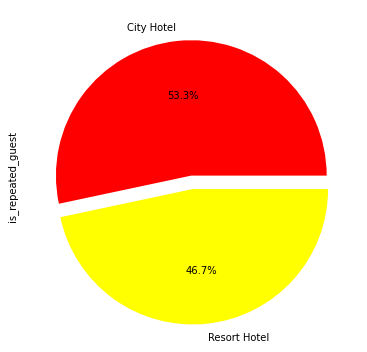

In [ ]:
#visualizing Percentage of Repeated Guests in hotels

dff1=df_hotel[df_hotel['is_repeated_guest']==1]
plt.figure(figsize=(10,5))
data = dff1.groupby("hotel")["is_repeated_guest"].count()
colors = ['Red','yellow']
explode=(0,0.1)
data.plot.pie(autopct="%.1f%%",colors=colors,explode=explode);

plt.tight_layout()

### City hotel has more number of repeated guest then Resort hotel

##**Market Segment**

Text(0.5, 1.0, 'Booking Type for Market Segment')

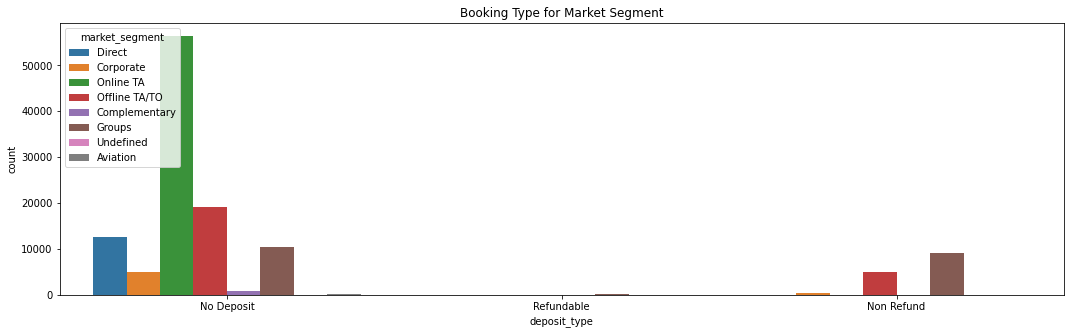

In [ ]:
#Bar plot of booking type for market segment

plt.figure(figsize=(18,5))
sns.countplot(data=df_hotel,x='deposit_type',hue='market_segment')
plt.title('Booking Type for Market Segment')

### The main source of the Booking is coming through online websites of the hotel

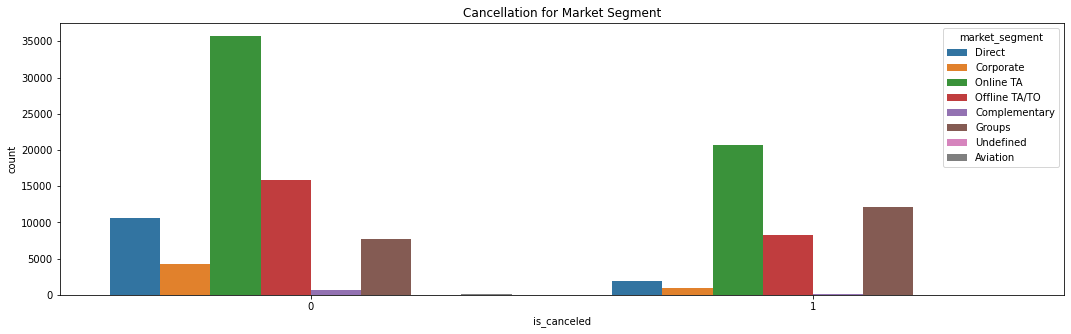

In [ ]:
# Bar plot of cancellation for market segment

plt.figure(figsize=(18,5))
sns.countplot(data=df_hotel,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()

Online Booking plays crucial role in Hotel Booking.

## **Night stays in the hotels**

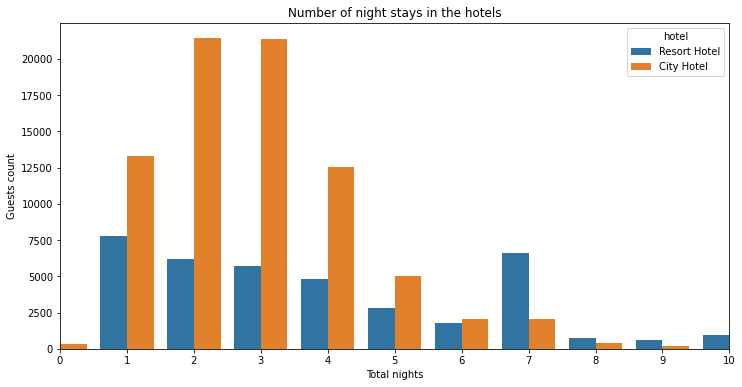

In [ ]:
# calculating night stays by dividing week into weekdays and weekends

df_hotel["total_nights"] = df_hotel['stays_in_weekend_nights'] + df_hotel['stays_in_week_nights']
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="total_nights", hue = "hotel", data = df_hotel)
ax.set(xlabel="Total nights", ylabel = "Guests count")
ax.set(xlim=(0, 10))
ax.set_title("Number of night stays in the hotels");

### Total nights = nights in week days + nights in weekends.

## **Special requests**

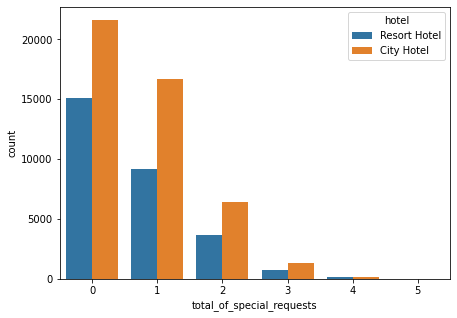

In [ ]:
#  visualizing Special requests

plt.subplots(figsize=(7,5))
sns.countplot(x='total_of_special_requests', hue='hotel',  data=df_not_canceled);


### Insights: City Hotel gets more Special request then Resort Hotel.

# **Conclusion**

2016 has more number of Bookings with 47.5% and it went down to 34.1% in 2017.

Q2 & Q3 are having higher number of Bookings. 

City Hotel has higher number of Bookings and Cancellations as well. 

Repeated guests percentage is more for City Hotel.

Online Booking plays crucial role in Hotel Booking. 

For Short stay people choose City Hotel. 

For long stay people choose Resort Hotel. 

Number of special requests for City Hotel is higher than Resort Hotel.

# **Suggestions**



*   Hotels can avail some discount offers in Q1 and Q4 as Bookings rate is less in 
these quarters.

*  Hotels can promote their business online as most of the Bookings are coming from online portals.

*   Special discount can be given to repeated guests.

*   City Hotel can come up with special plans for long staying guests.


*   Resort Hotel can come up with special plans for short staying guests







